# Multiliner Regression_Case2-Toyoto Corolla Price Prediction

# Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [1]:
import math
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import spearmanr
import scipy.stats as stat

import statsmodels.api as smf

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.regressionplots import influence_plot


# Import & analyze Data(EDA)

In [2]:
toyota=pd.read_csv("/Users/ayaskantsamal/Documents/EXCELR/assignments/ToyotaCorolla.csv",encoding='latin1')
toyota.head(10)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
6,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,...,1,1,1,0,0,1,1,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
8,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,1,0,0,0,1,1,0
9,10,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,...,0,0,1,0,0,0,1,0,0,0


In [3]:
toyota1=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [4]:
toyota1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [5]:
toyota1.shape

(1436, 9)

In [6]:
toyota1.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
Quarterly_Tax,1436.0,87.122563,41.128611,19.0,69.0,85.0,85.00,283.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


In [7]:
toyota1.isna().sum() # no Null values

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [8]:
toyota1[toyota1.duplicated()] # one duplicate row

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
# removing the duplicated row

toyota1=toyota1.drop_duplicates().reset_index(drop=True)
toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [10]:
toyota1.shape # One row is removed

(1435, 9)

In [11]:
#  renaming the columns 

toyota1=toyota1.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis=1)
toyota1

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [12]:
toyota1.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1435.0,10720.915679,3608.732978,4350.0,8450.0,9900.0,11950.0,32500.0
Age,1435.0,55.980488,18.563312,1.0,44.0,61.0,70.0,80.0
KM,1435.0,68571.782578,37491.094553,1.0,43000.0,63451.0,87041.5,243000.0
HP,1435.0,101.491986,14.981408,69.0,90.0,110.0,110.0,192.0
cc,1435.0,1576.560976,424.387533,1300.0,1400.0,1600.0,1600.0,16000.0
Doors,1435.0,4.032753,0.952667,2.0,3.0,4.0,5.0,5.0
Gears,1435.0,5.026481,0.188575,3.0,5.0,5.0,5.0,6.0
QT,1435.0,87.020209,40.959588,19.0,69.0,85.0,85.0,283.0
Weight,1435.0,1072.287108,52.251882,1000.0,1040.0,1070.0,1085.0,1615.0


# Check if the data is Balanced and normally distributed

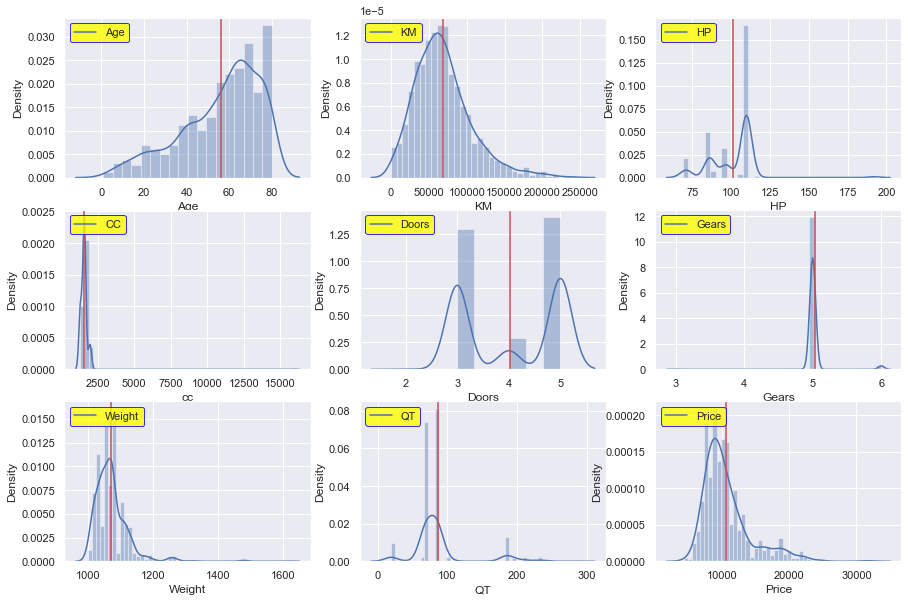

In [13]:
# Visualizing of the distribution 

# first plot
sns.set(rc={"figure.figsize": (15,10)})
plt.subplot(3,3,1)
Age = sns.distplot(toyota1['Age'])
plt.axvline(toyota1["Age"].mean(),color='r')
plt.legend(["Age"],loc='upper left',facecolor='yellow',edgecolor='blue')

# Second Plot

plt.subplot(3,3,2)
KM = sns.distplot(toyota1['KM'])
plt.axvline(toyota1["KM"].mean(),color='r')
plt.legend(["KM"],loc='upper left',facecolor='yellow',edgecolor='blue')

# Third Plot
plt.subplot(3,3,3)
HP = sns.distplot(toyota1['HP'])
plt.axvline(toyota1["HP"].mean(),color='r')
plt.legend(["HP"],loc='upper left',facecolor='yellow',edgecolor='blue')

# Fourth Plot
plt.subplot(3,3,4)
cc = sns.distplot(toyota1['cc'])
plt.axvline(toyota1["cc"].mean(),color='r')
plt.legend(["CC"],loc='upper left',facecolor='yellow',edgecolor='blue')

# Fifth Plot
plt.subplot(3,3,5)
Doors = sns.distplot(toyota1['Doors'])
plt.axvline(toyota1["Doors"].mean(),color='r')
plt.legend(["Doors"],loc='upper left',facecolor='yellow',edgecolor='blue')

# Sixth Plot
plt.subplot(3,3,6)
Gears = sns.distplot(toyota1['Gears'])
plt.axvline(toyota1["Gears"].mean(),color='r')
plt.legend(["Gears"],loc='upper left',facecolor='yellow',edgecolor='blue')

# Seventh Plot
plt.subplot(3,3,7)
Weight = sns.distplot(toyota1['Weight'])
plt.axvline(toyota1["Weight"].mean(),color='r')
plt.legend(["Weight"],loc='upper left',facecolor='yellow',edgecolor='blue')

# Eighth Plot
plt.subplot(3,3,8)
QT = sns.distplot(toyota1['QT'])
plt.axvline(toyota1["QT"].mean(),color='r')
plt.legend(["QT"],loc='upper left',facecolor='yellow',edgecolor='blue')

# Ninth Plot
plt.subplot(3,3,9)
Price = sns.distplot(toyota1['Price'])
plt.axvline(toyota1["Price"].mean(),color='r')
plt.legend(["Price"],loc='upper left',facecolor='yellow',edgecolor='blue')

In [14]:
toyota1.skew()

Price      1.696579
Age       -0.825567
KM         1.017023
HP         0.957833
cc        27.452196
Doors     -0.075056
Gears      2.282921
QT         1.995336
Weight     3.116518
dtype: float64

In [15]:
# Shappiro test to check the data normalisation for sorting time

from scipy.stats import shapiro

for i in range (0,9):
    DataToTest=toyota1[toyota1.columns[i]]


    stat,p = shapiro(DataToTest)

    print('stat=%.2f, p=%.3f' % (stat,p))

    if p > .05:
        print(toyota1.columns[i],": Normal Distribution")
    else:
        print(toyota1.columns[i],":Not normal distribution")

stat=0.85, p=0.000
Price :Not normal distribution
stat=0.93, p=0.000
Age :Not normal distribution
stat=0.95, p=0.000
KM :Not normal distribution
stat=0.71, p=0.000
HP :Not normal distribution
stat=0.23, p=0.000
cc :Not normal distribution
stat=0.70, p=0.000
Doors :Not normal distribution
stat=0.18, p=0.000
Gears :Not normal distribution
stat=0.65, p=0.000
QT :Not normal distribution
stat=0.78, p=0.000
Weight :Not normal distribution


# checking the correlation 

In [16]:
# Spearman and Pearseon Corelation of variables

from scipy.stats import spearmanr


for j in range(8,0,-1):

    for i in range(0,9):
        if i <9:
#            print(i)
            sample1=toyota1[toyota1.columns[i]]
            sample2=toyota1[toyota1.columns[j]]
#            print(j)
            if i!=j:
                stat,p = spearmanr(sample1,sample2)
                print('stat=%.2f, p=%.8f' % (stat,p))
                if p > .05:
                    print(toyota1.columns[i],":",toyota1.columns[j],"--independent variables")
                else:
                    print(toyota1.columns[i],":",toyota1.columns[j],"--dependent variables")
        
            else:
                exit

stat=0.41, p=0.00000000
Price : Weight --dependent variables
stat=-0.38, p=0.00000000
Age : Weight --dependent variables
stat=-0.06, p=0.01876686
KM : Weight --dependent variables
stat=0.17, p=0.00000000
HP : Weight --dependent variables
stat=0.68, p=0.00000000
cc : Weight --dependent variables
stat=0.44, p=0.00000000
Doors : Weight --dependent variables
stat=0.02, p=0.55323989
Gears : Weight --independent variables
stat=0.72, p=0.00000000
QT : Weight --dependent variables
stat=0.32, p=0.00000000
Price : QT --dependent variables
stat=-0.27, p=0.00000000
Age : QT --dependent variables
stat=0.03, p=0.32457389
KM : QT --independent variables
stat=0.06, p=0.01696004
HP : QT --dependent variables
stat=0.52, p=0.00000000
cc : QT --dependent variables
stat=0.36, p=0.00000000
Doors : QT --dependent variables
stat=0.10, p=0.00013525
Gears : QT --dependent variables
stat=0.72, p=0.00000000
Weight : QT --dependent variables
stat=0.08, p=0.00386128
Price : Gears --dependent variables
stat=-0.02, p

In [17]:
toyota1.corr(method='spearman')

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.841952,-0.614852,0.234190,0.118364,0.200262,0.076227,0.320491,0.414465
Age,-0.841952,1.000000,0.531130,-0.091289,-0.113872,-0.132429,-0.023289,-0.272817,-0.381007
KM,-0.614852,0.531130,1.000000,-0.203164,0.186191,-0.038971,0.019787,0.026023,-0.062033
HP,0.234190,-0.091289,-0.203164,1.000000,0.364967,0.152526,0.136185,0.063020,0.168533
cc,0.118364,-0.113872,0.186191,0.364967,1.000000,0.151083,0.072247,0.520732,0.684018
Doors,0.200262,-0.132429,-0.038971,0.152526,0.151083,1.000000,-0.166590,0.355246,0.444698
Gears,0.076227,-0.023289,0.019787,0.136185,0.072247,-0.166590,1.000000,0.100586,0.015664
QT,0.320491,-0.272817,0.026023,0.063020,0.520732,0.355246,0.100586,1.000000,0.719808
Weight,0.414465,-0.381007,-0.062033,0.168533,0.684018,0.444698,0.015664,0.719808,1.000000


In [18]:
toyota1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


Text(0.5, 362.96221590909096, 'spearman correlation')

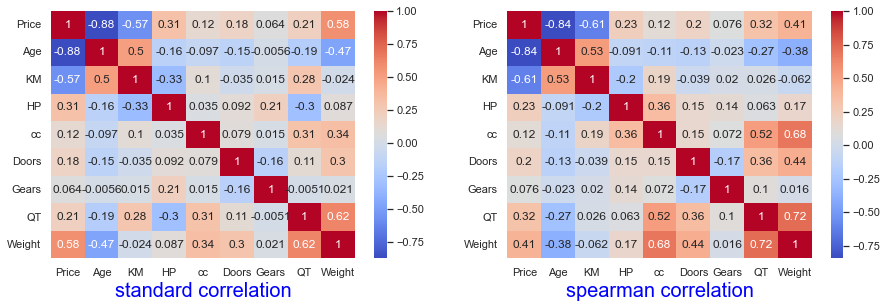

In [19]:
plt.subplot(2,2,1)
heatmap= sns.heatmap(toyota1.corr(),annot=True,cmap="coolwarm")
plt.xlabel("standard correlation",size=20,color="blue")

plt.subplot(2,2,2)
heatmap= sns.heatmap(toyota1.corr(method='spearman'),annot=True,cmap="coolwarm")
plt.xlabel("spearman correlation",size=20,color="blue")

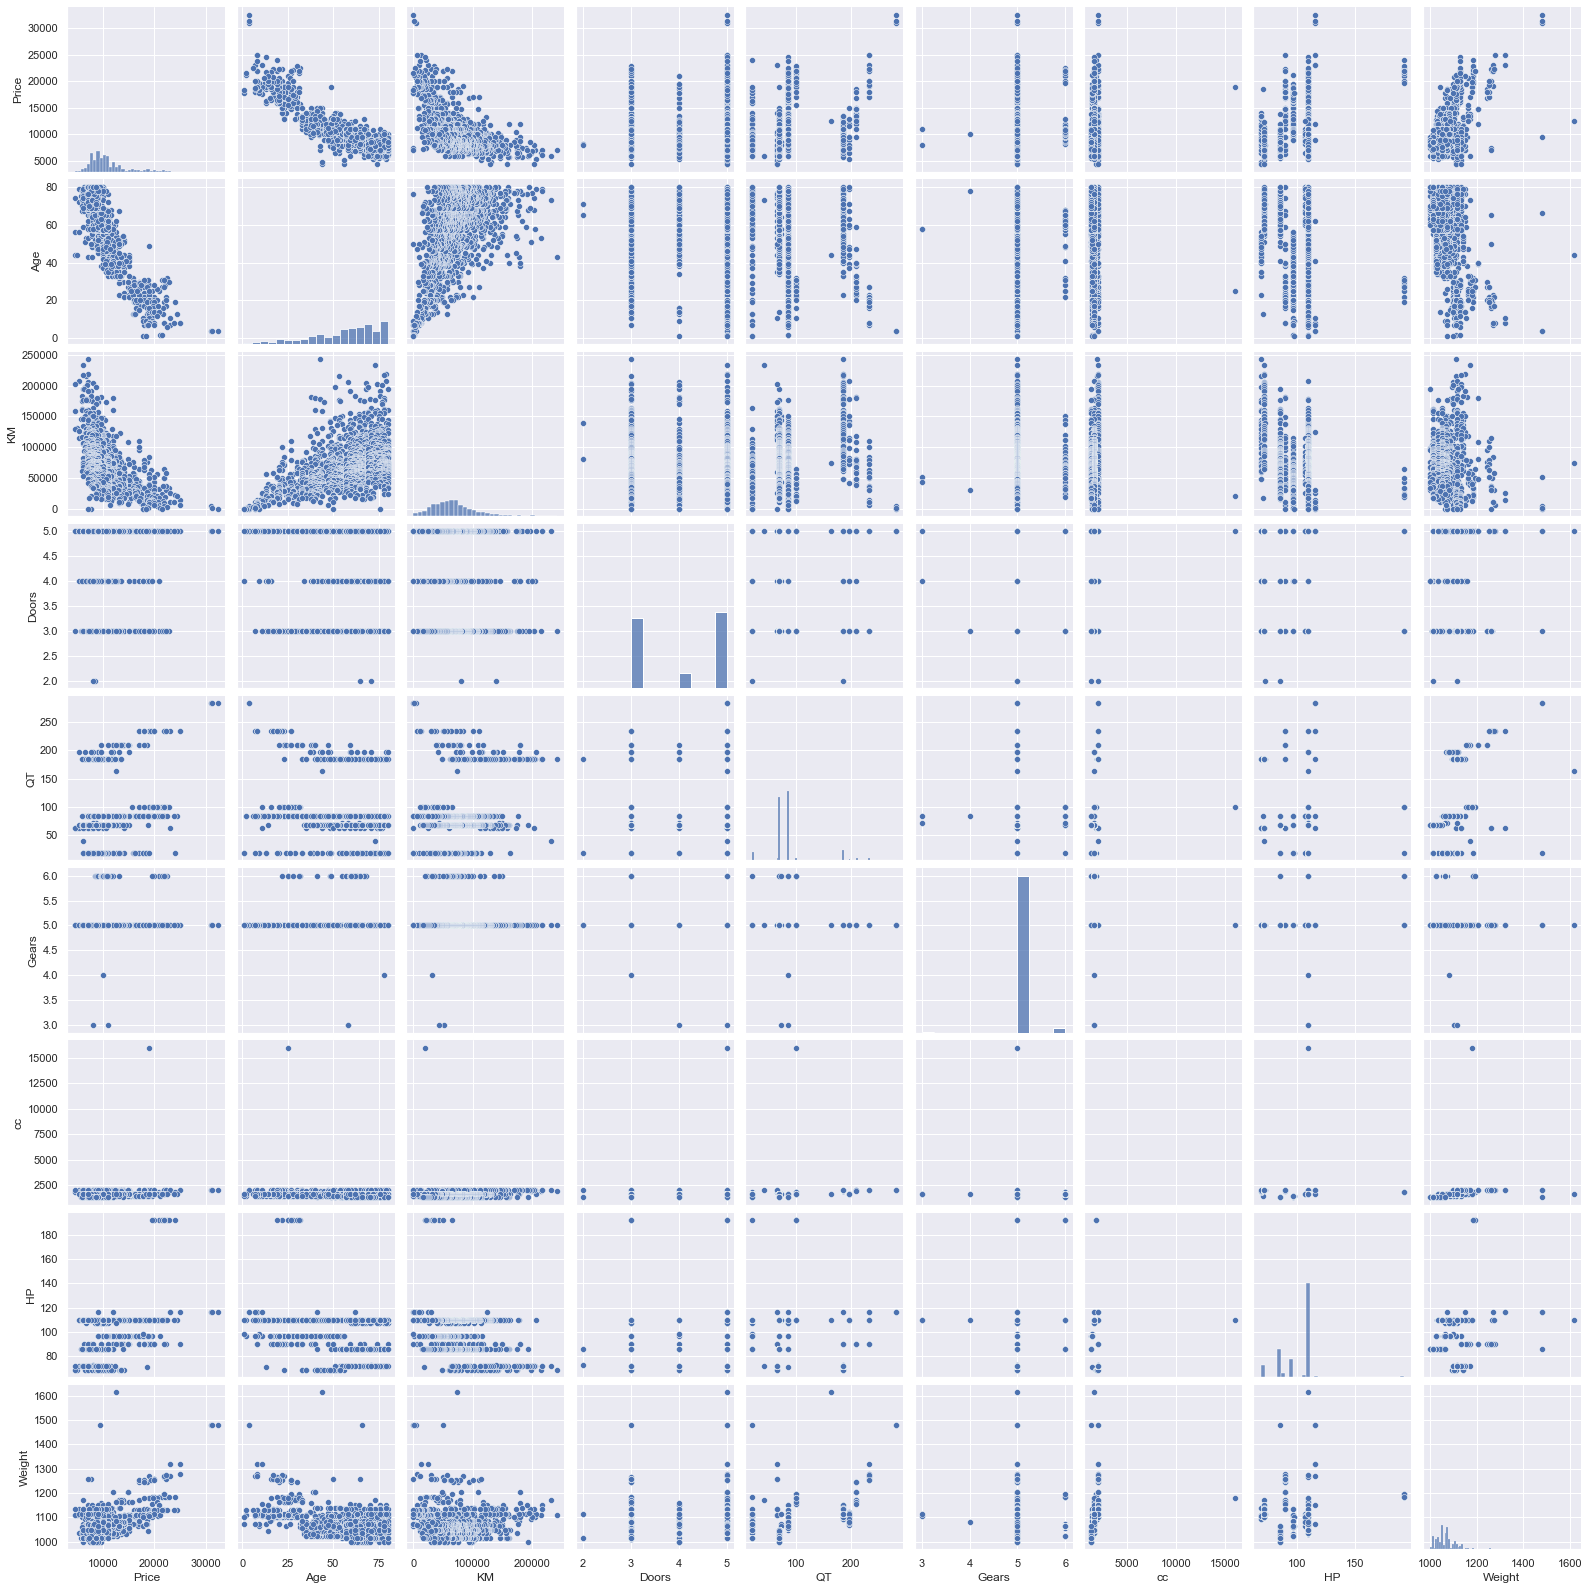

In [20]:
# Creating pairplot
sns.pairplot(toyota1[['Price','Age','KM','Doors','QT','Gears','cc','HP','Weight']])

# Check Outliers

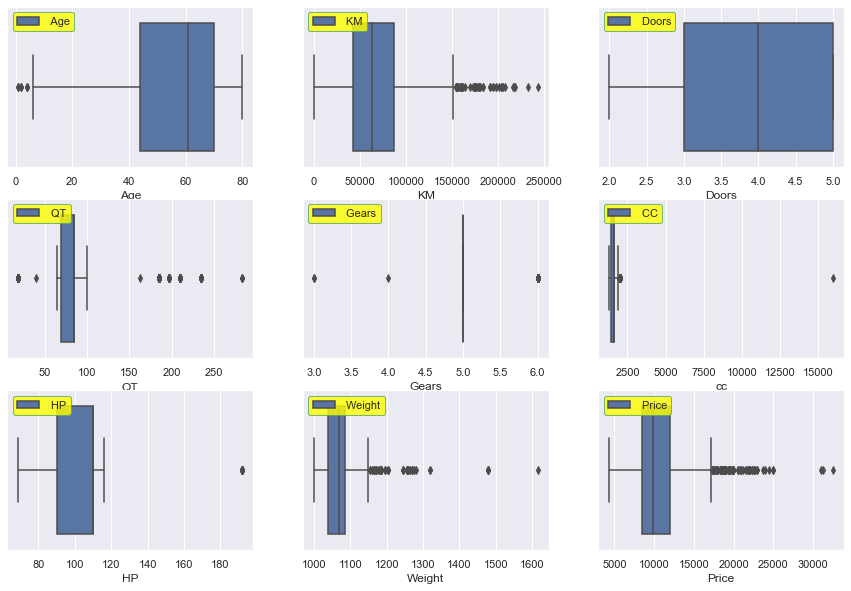

In [21]:
# Using boxplots to detect outliers
sns.set(rc={"figure.figsize": (15,10)})
#creating first plot 
plt.subplot(3,3,1)
ax = sns.boxplot(x=toyota1['Age'])
plt.legend([' Age'],loc='upper left',facecolor='yellow',edgecolor='g')

# Creating second plot
plt.subplot(3,3,2)
ax = sns.boxplot(x=toyota1['KM'])
plt.legend([' KM'],loc='upper left',facecolor='yellow',edgecolor='g')

# Creating third plot
plt.subplot(3,3,3)
ax = sns.boxplot(x=toyota1['Doors'])
plt.legend([' Doors'],loc='upper left',facecolor='yellow',edgecolor='g')

# Creating fourth plot
plt.subplot(3,3,4)
ax = sns.boxplot(x=toyota1['QT'])
plt.legend([' QT'],loc='upper left',facecolor='yellow',edgecolor='g')

# Creating fifth plot
plt.subplot(3,3,5)
ax = sns.boxplot(x=toyota1['Gears'])
plt.legend([' Gears'],loc='upper left',facecolor='yellow',edgecolor='g')

# Creating sixth plot
plt.subplot(3,3,6)
ax = sns.boxplot(x=toyota1['cc'])
plt.legend([' CC'],loc='upper left',facecolor='yellow',edgecolor='g')


# Creating 7th plot
plt.subplot(3,3,7)
ax = sns.boxplot(x=toyota1['HP'])
plt.legend([' HP'],loc='upper left',facecolor='yellow',edgecolor='g')


# Creating 8th plot
plt.subplot(3,3,8)
ax = sns.boxplot(x=toyota1['Weight'])
plt.legend([' Weight'],loc='upper left',facecolor='yellow',edgecolor='g')

# Creating 9th plot
plt.subplot(3,3,9)
ax = sns.boxplot(x=toyota1['Price'])
plt.legend([' Price'],loc='upper left',facecolor='yellow',edgecolor='g')

plt.show()

#### Most outliers are Preesent under "AGE", "KM","QT", "Price" and "weight"

# Model Without scaling- RAW Data Model with Outliers

In [28]:
import statsmodels.formula.api as sm
raw_model = sm.ols('Price~Age+KM+Weight+HP+cc+Gears+QT+Doors',data=toyota1).fit()
raw_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:54:45   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Detecting Influencers/Outliers in the RAW Model (overall model level)

In [29]:
(c,_)=raw_model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

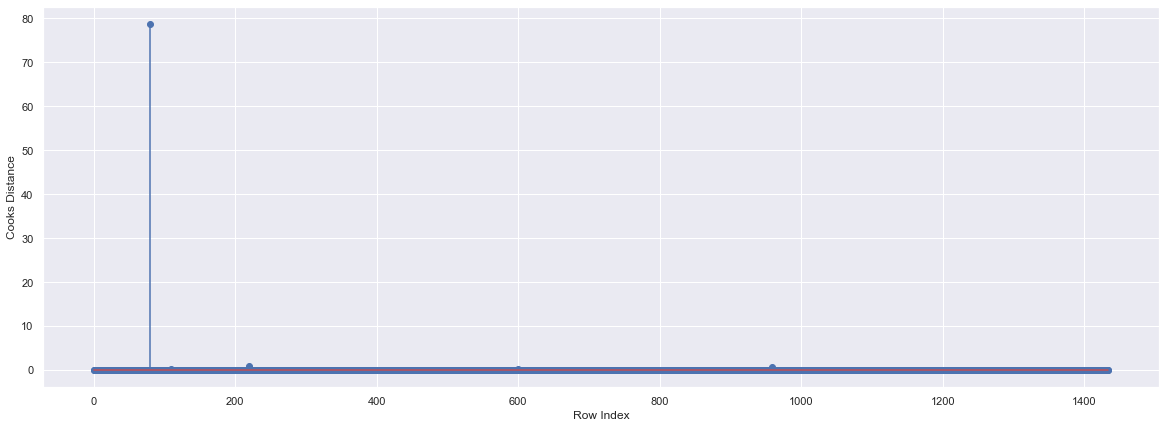

In [30]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

### Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

In [31]:

k=toyota1.shape[1]
n=toyota1.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.02


In [32]:
# Index and value of influencer where C>0.02
np.argmax(c) , np.max(c)

np.where(c>0.02)

(array([  14,   16,   80,  109,  110,  111,  140,  190,  191,  220,  522,
         600,  653,  959,  990, 1057]),)

In [33]:
toyota1[toyota1.index.isin([14,16,80,109,110,111,140,190,191,220,522,600,653,959,990,1057])] 

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
14,22500,32,34131,192,1800,3,6,100,1185
16,22750,30,34000,192,1800,3,5,100,1185
80,18950,25,20019,110,16000,5,5,100,1180
109,32500,4,1,116,2000,5,5,283,1480
110,31000,4,4000,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480
140,23950,19,21684,192,1800,5,5,19,1185
190,4350,44,158320,69,1800,5,5,64,1110
191,4750,44,131273,69,1800,5,5,64,1110
220,12450,44,74172,110,1600,5,5,163,1615


# Improving the model

In [34]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toyota3=toyota1.copy()
toyota3=toyota3.drop(toyota3.index[[14,16,80,109,110,111,140,190,191,220,522,600,653,959,990,1057]],axis=0).reset_index(drop=True)
toyota3.head(10)

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [35]:
toyota3.shape

(1419, 9)

In [36]:
import statsmodels.formula.api as sm
raw_model_no_influencer=sm.ols("Price~Age+KM+Weight+HP+cc+Gears+QT+Doors",data=toyota3).fit()
raw_model_no_influencer.rsquared,raw_model_no_influencer.rsquared_adj
print("Thus model accuracy is improved to",raw_model_no_influencer.rsquared,raw_model_no_influencer.rsquared_adj)

Thus model accuracy is improved to 0.8868558376912805 0.8862138849973303


In [37]:
(c,_)=raw_model_no_influencer.get_influence().cooks_distance
c

array([7.80996346e-03, 4.01777059e-03, 5.54904077e-03, ...,
       2.04109290e-05, 1.35576499e-03, 2.61018150e-02])

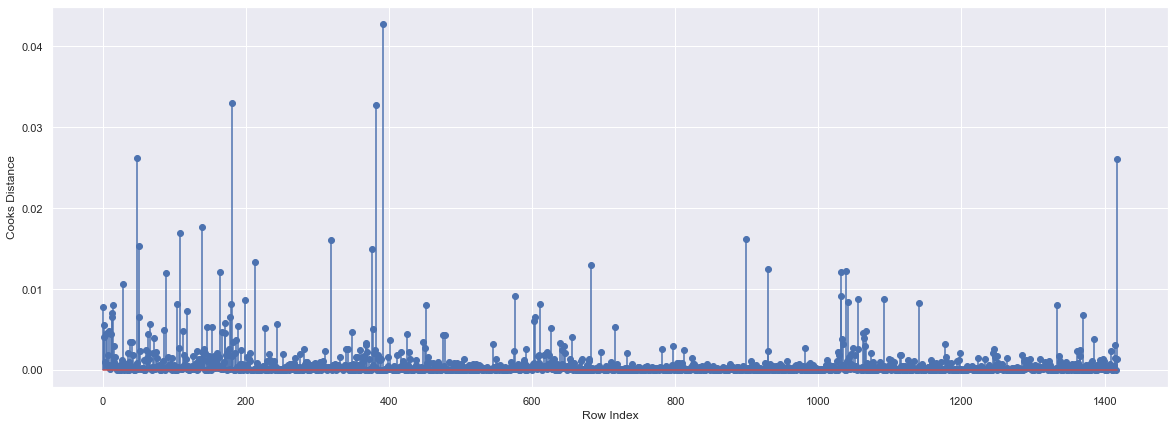

In [38]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota3)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
np.argmax(c) , np.max(c)

np.where(c>0.02)

(array([  47,  181,  382,  391, 1418]),)

In [40]:
toyota4=toyota3.copy()
toyota4=toyota4.drop(toyota3.index[[47,  181,  382,  391, 1418]],axis=0).reset_index(drop=True)
toyota4.head(10)

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [41]:
import statsmodels.formula.api as sm
raw_model_no_influencer1=sm.ols("Price~Age+KM+Weight+HP+cc+Gears+QT+Doors",data=toyota4).fit()
raw_model_no_influencer1.rsquared,raw_model_no_influencer1.rsquared_adj
print("Thus model accuracy is improved to",raw_model_no_influencer1.rsquared,raw_model_no_influencer1.rsquared_adj)

Thus model accuracy is improved to 0.8897942788961625 0.8891667730108738


In [42]:
(c,_)=raw_model_no_influencer1.get_influence().cooks_distance
c

array([8.07115546e-03, 4.17221287e-03, 5.72036594e-03, ...,
       3.19434830e-03, 2.12122914e-05, 1.42515690e-03])

In [43]:
np.argmax(c) , np.max(c)

np.where(c>0.02)

(array([], dtype=int64),)

In [44]:
toyota4.shape

(1414, 9)

# Applying Scaling 

#### As this is a liner regression we will use standardisation, however as the data are impacted by outliers it is better to apply robus scaler first before applying standrad scaler


This scaler removes the median from the data
Scales the data by the InterQuartile Range(IQR= Q3 – Q1)
The interquartile range can be defined as-


Thus, the formula would be:

x_robust = (x – Q1)/(Q3 – Q1)

Applying Robust sacler on thefeatures that have outliers.

In [45]:
robust_scaled = toyota4.copy()
columns= ['Price','Age','KM','Weight','QT']
features = robust_scaled[columns]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

robust_scaled[columns] = scaler.fit_transform(features.values)
robust_scaled.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,1.037838,-1.461538,-0.376070,90,2000,3,5,7.8125,2.222222
1,1.109910,-1.461538,0.215642,90,2000,3,5,7.8125,2.222222
2,1.167568,-1.423077,-0.496346,90,2000,3,5,7.8125,2.222222
3,1.455856,-1.346154,-0.352950,90,2000,3,5,7.8125,2.222222
4,1.109910,-1.192308,-0.569561,90,2000,3,5,7.8125,2.333333


In [46]:
robust_transformed_model = sm.ols("Price~Age+KM+HP+cc+Doors+Gears+QT+Weight", data = robust_scaled).fit()
# Finding rsquared values for robust transformation
robust_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1418.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:54:46   Log-Likelihood:                -422.69
No. Observations:                1414   AIC:                             863.4
Df Residuals:                    1405   BIC:                             910.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3749      0.293      1.279      0.201      -0.200       0.950
Age           -0.8354      0.018    -46.885      0.000      -0.870      -0.800
KM            -0.2179      0.014    -15.230      0.000      -0.246      -0.190
HP             0.0078      0.001      9.668      0.000       0.006       0.009
cc            -0.0009    8.6e-05    -10.696      0.000      -0.001      -0.001
Doors         -0.0366      0.010     -3.558      0.000      -0.057      -0.016
Gears          0.0934      0.051      1.823      0.068      -0.007       0.194
QT             0.0037      0.006      0.589      0.556      -0.009       0.016
Weight         0.4133      0.018     22.941      0.000       0.378       0.449
==============================================================================
Omnibus:                       51.796   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.050
Skew:                           0.315   Prob(JB):                     9.24e-19
Kurtosis:                       4.007   Cond. No.                     5.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Applying Standard scaler on Robust data

For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1.


z = x – mean/std_dev

However, Standard Scaler assumes that the distribution of the variable is normal. 

If the variables are not normally distributed, convert the variables to a normal distribution and then apply this scaler

In [47]:
array_stand_scaler=robust_scaled.values
stand_scaled=StandardScaler().fit(array_stand_scaler).transform(array_stand_scaler)
stand_scaled

array([[ 0.83317286, -1.80136513, -0.58334122, ..., -0.1506798 ,
         3.08999599,  2.14071202],
       [ 0.90650292, -1.80136513,  0.1169764 , ..., -0.1506798 ,
         3.08999599,  2.14071202],
       [ 0.96516697, -1.7470935 , -0.72569316, ..., -0.1506798 ,
         3.08999599,  2.14071202],
       ...,
       [ 0.05440759,  0.85794462, -1.33857565, ..., -0.1506798 ,
        -0.44510084, -1.23308066],
       [-0.6334284 ,  0.80367299, -1.39211617, ..., -0.1506798 ,
        -0.44510084, -1.23308066],
       [-1.00007872,  0.74940136, -1.39481479, ..., -0.1506798 ,
        -0.44510084, -1.23308066]])

In [48]:
# creating dataframe 
df_stand_scaling=pd.DataFrame({'Price':stand_scaled[:,0],'Age':stand_scaled[:,1],'KM':stand_scaled[:,2],'HP':stand_scaled[:,3],'cc':stand_scaled[:,4],'Doors':stand_scaled[:,5],'Gears':stand_scaled[:,6],'QT':stand_scaled[:,7],'Weight':stand_scaled[:,8]})
df_stand_scaling.head(5)

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,0.833173,-1.801365,-0.583341,-0.799862,2.362971,-1.080753,-0.15068,3.089996,2.140712
1,0.906503,-1.801365,0.116976,-0.799862,2.362971,-1.080753,-0.15068,3.089996,2.140712
2,0.965167,-1.747094,-0.725693,-0.799862,2.362971,-1.080753,-0.15068,3.089996,2.140712
3,1.258487,-1.638550,-0.555977,-0.799862,2.362971,-1.080753,-0.15068,3.089996,2.140712
4,0.906503,-1.421464,-0.812346,-0.799862,2.362971,-1.080753,-0.15068,3.089996,2.253172


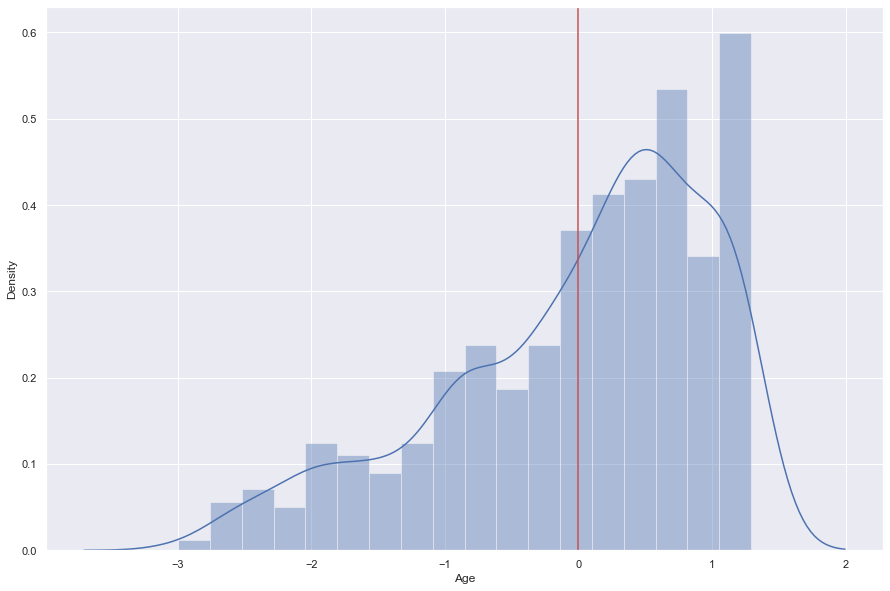

In [49]:
sns.distplot(df_stand_scaling.Age)
plt.axvline(df_stand_scaling.Age.mean(),color='r')

In [50]:
standard_transformed_model = sm.ols("Price~Age+KM+HP+cc+Doors+Gears+QT+Weight", data = df_stand_scaling).fit()
# Finding rsquared values for standard transformation
standard_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1418.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:54:46   Log-Likelihood:                -447.16
No. Observations:                1414   AIC:                             912.3
Df Residuals:                    1405   BIC:                             959.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.446e-16      0.009  -2.76e-14      1.000      -0.017       0.017
Age           -0.6024      0.013    -46.885      0.000      -0.628      -0.577
KM            -0.1874      0.012    -15.230      0.000      -0.211      -0.163
HP             0.1115      0.012      9.668      0.000       0.089       0.134
cc            -0.1729      0.016    -10.696      0.000      -0.205      -0.141
Doors         -0.0354      0.010     -3.558      0.000      -0.055      -0.016
Gears          0.0169      0.009      1.823      0.068      -0.001       0.035
QT             0.0095      0.016      0.589      0.556      -0.022       0.041
Weight         0.4155      0.018     22.941      0.000       0.380       0.451
==============================================================================
Omnibus:                       51.796   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.050
Skew:                           0.315   Prob(JB):                     9.24e-19
Kurtosis:                       4.007   Cond. No.                         4.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
(c,_)=standard_transformed_model.get_influence().cooks_distance
c

array([8.07115546e-03, 4.17221287e-03, 5.72036594e-03, ...,
       3.19434830e-03, 2.12122914e-05, 1.42515690e-03])

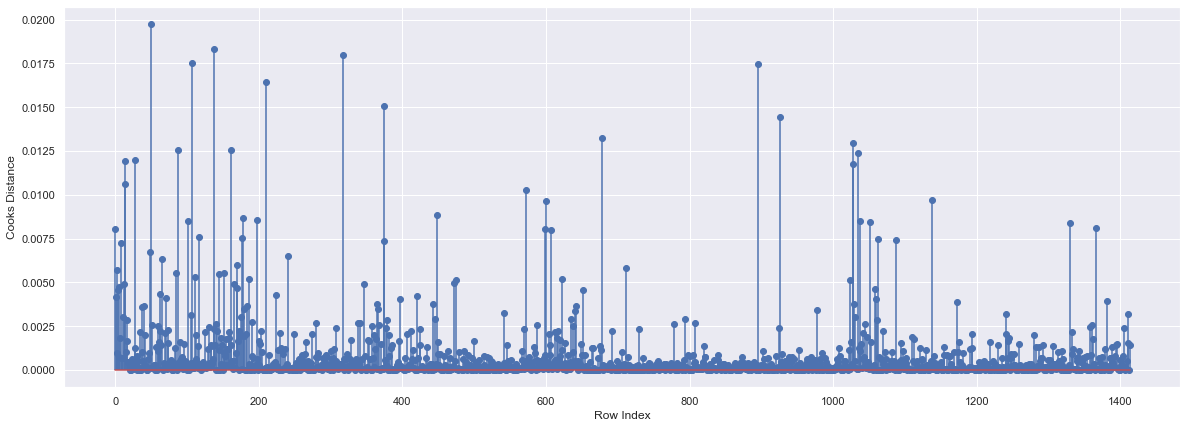

In [75]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df_stand_scaling)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [76]:

k=df_stand_scaling.shape[1]
n=df_stand_scaling.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.02


In [78]:
# Index and value of influencer where C>0.02
np.argmax(c) , np.max(c)

np.where(c>0.02)

(array([], dtype=int64),)

### No outliers present after scaling, we can now proceed with checking the assumption of the scaled model as the R square value is better than the normal (without scaled model) 

### Checking RMSE for both the models

In [82]:
pred1=raw_model_no_influencer1.predict()
rmse1=np.sqrt(mean_squared_error(toyota4.Price,pred1))
print("RMSE  is:",rmse1)

RMSE  is: 1131.7748051147196


In [83]:
pred2=standard_transformed_model.predict()
rmse2=np.sqrt(mean_squared_error(df_stand_scaling.Price,pred2))
print("RMSE  is:",rmse2)

RMSE  is: 0.3319724704005402


# Now lets check all the assumption

### Checking 1st Assumptions — Linear relatioship

In [51]:
X=df_stand_scaling.iloc[:,1:9]
y=df_stand_scaling.iloc[:,0]


import statsmodels.api as sm

# Define the modell
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Fit the model
result = model.fit()

# Print the model summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1418.
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:54:46   Log-Likelihood:                -447.16
No. Observations:                1414   AIC:                             912.3
Df Residuals:                    1405   BIC:                             959.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.446e-16      0.009  -2.76e-14      1.0

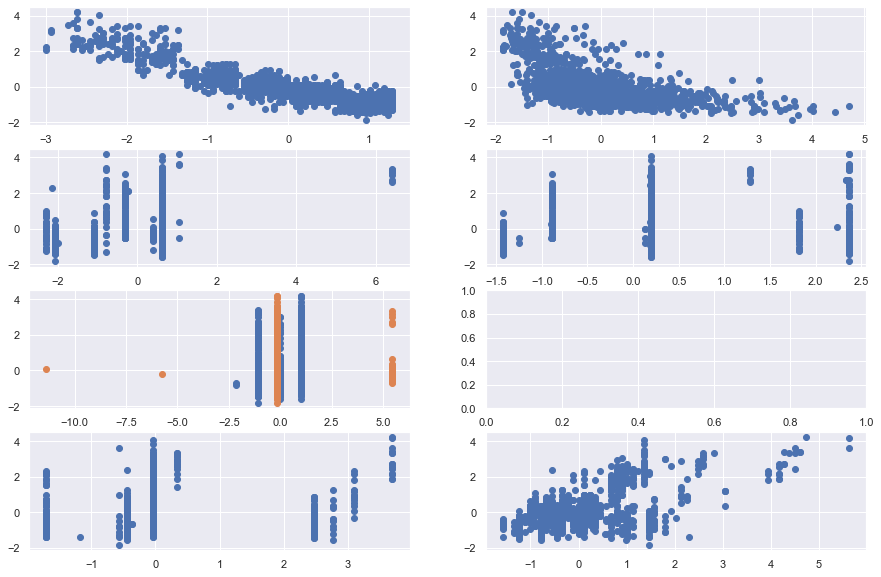

In [52]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4, 2)
ax1.scatter(X['Age'], y)            
ax2.scatter(X['KM'], y)
ax3.scatter(X['HP'], y)
ax4.scatter(X['cc'], y)
ax5.scatter(X['Doors'], y)
ax5.scatter(X['Gears'], y) # Should I drop it???? 
ax7.scatter(X['QT'], y)
ax8.scatter(X['Weight'], y)
plt.show()

#### checking 2nd Assumptions — No or little Multicollinearity

In [57]:
import statsmodels.api as smm
import statsmodels.formula.api as sm
r_sqr_age = sm.ols('Age~HP+Weight+cc+Doors+QT+Gears+KM',toyota4 ).fit().rsquared
vif_age = 1/(1-r_sqr_age)
r_sqr_weight = sm.ols('Weight~HP+Age+cc+Doors+QT+Gears+KM', toyota4).fit().rsquared
vif_weight = 1/(1-r_sqr_weight)
r_sqr_cc = sm.ols('cc~HP+Weight+Age+Doors+QT+Gears+KM', toyota4).fit().rsquared
vif_cc = 1/(1-r_sqr_cc)
r_sqr_hp = sm.ols('HP~Age+Weight+cc+Doors+QT+Gears+KM', toyota4).fit().rsquared
vif_hp = 1/(1-r_sqr_hp)
r_sqr_qt = sm.ols('QT~HP+Weight+cc+Doors+Age+Gears+KM', toyota4).fit().rsquared
vif_qt = 1/(1-r_sqr_qt)
r_sqr_km = sm.ols('KM~HP+Weight+cc+Doors+QT+Gears+Age', toyota4).fit().rsquared
vif_km = 1/(1-r_sqr_km)
r_sqr_gears = sm.ols('Gears~HP+Weight+cc+Doors+QT+Age+KM', toyota4).fit().rsquared
vif_gears = 1/(1-r_sqr_gears)
r_sqr_doors = sm.ols('Doors~HP+Weight+cc+Age+QT+Gears+KM', toyota4).fit().rsquared
vif_doors = 1/(1-r_sqr_doors)

In [58]:
vif_frame = pd.DataFrame({'Variables':['Doors','HP','Weight','cc','Age','QT','Gears','KM'], 'VIF':[vif_doors,vif_hp,vif_weight,vif_cc,vif_age,vif_qt,vif_gears,vif_km]}, index = None)
vif_frame.set_index('Variables', inplace = True)
vif_frame.sort_values(by = 'VIF')

,VIF
Variables,
Gears,1.101670
Doors,1.264102
HP,1.695172
KM,1.929342
Age,2.104346
QT,3.285584
cc,3.330448
Weight,4.182233


### Checking 3rd Assumptions - Homoscedasticity - constant variance

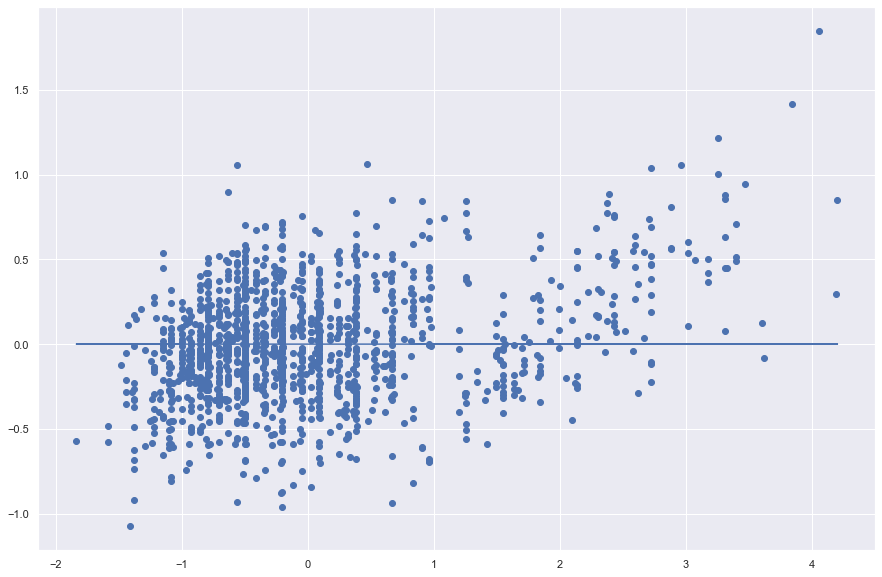

In [59]:
residuals = result.resid
plt.scatter(y, residuals)
plt.plot(y, [0]*len(y))

### Checking 4th Assumption - No Autocorrelation of errors

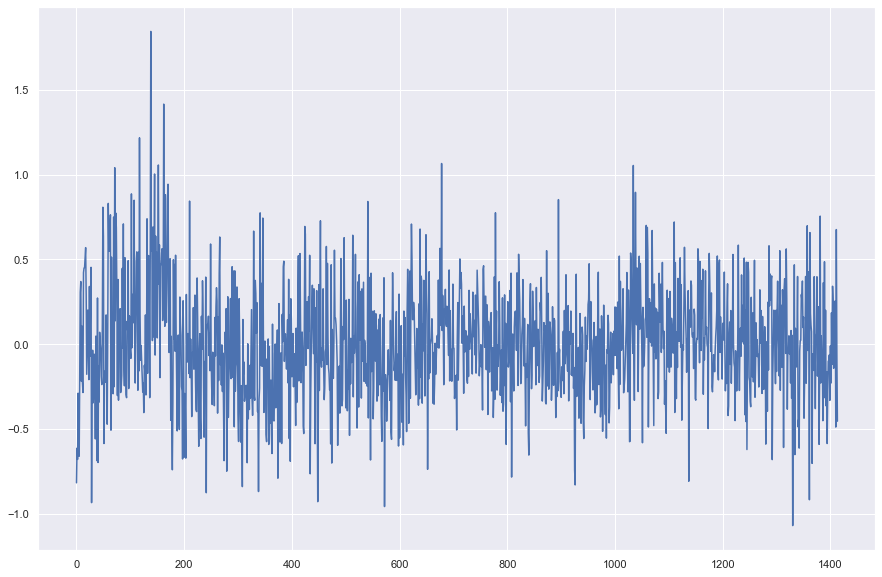

In [60]:
plt.plot(residuals.index, residuals)

### Checking 5th Assumption - residual normality

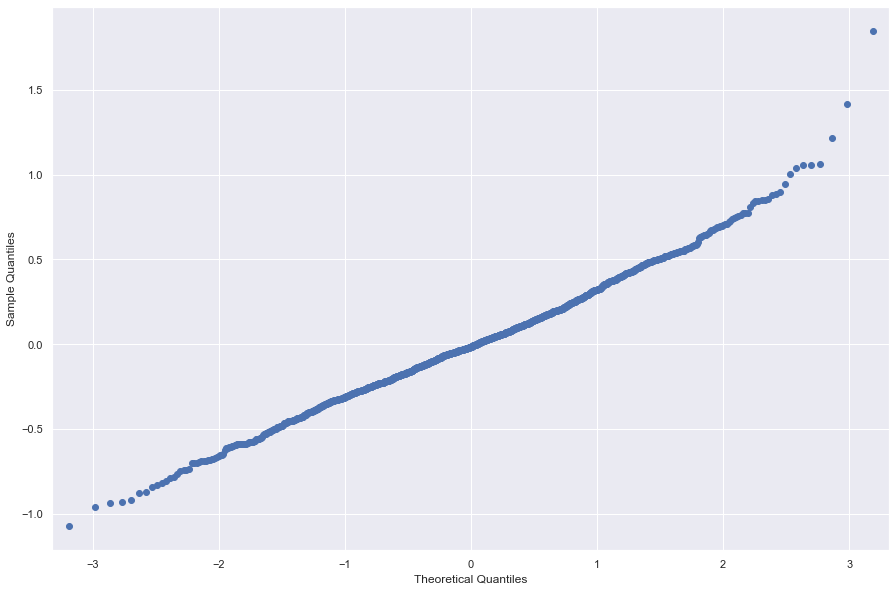

In [61]:
import statsmodels.formula.api as sm
import statsmodels.api as smf
residuals = result.resid
smf.qqplot(residuals)
plt.show()



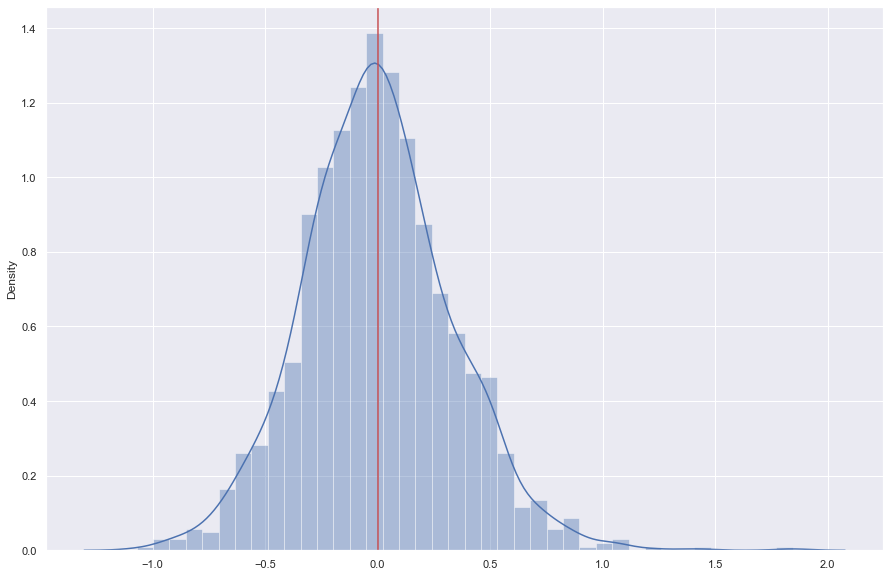

In [62]:
import seaborn as sns
sns.distplot(residuals)
plt.axvline(np.mean(residuals),color='r')

### Checking 6th Assumptions - Residual relation with independent variables

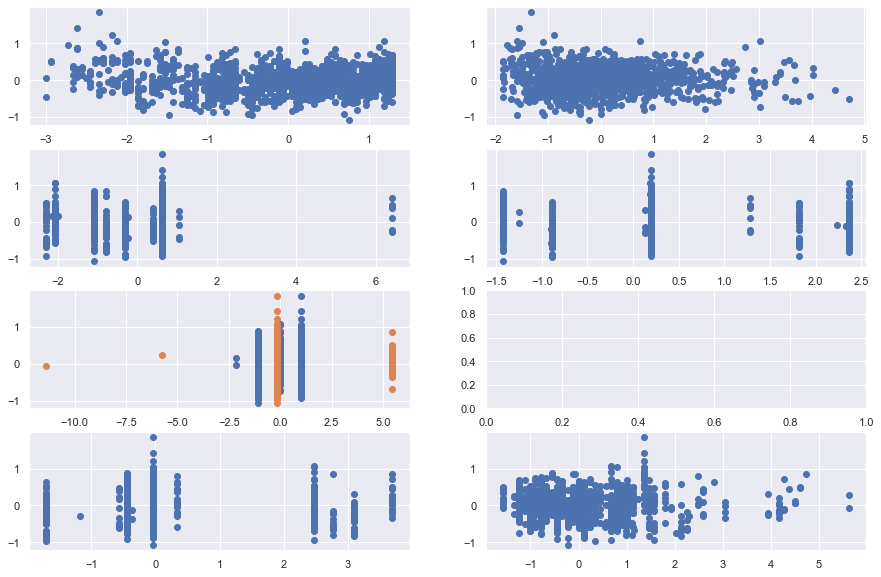

In [63]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4, 2)
ax1.scatter(X['Age'], residuals)            
ax2.scatter(X['KM'],residuals)
ax3.scatter(X['HP'],residuals)
ax4.scatter(X['cc'], residuals)
ax5.scatter(X['Doors'], residuals)
ax5.scatter(X['Gears'], residuals) # Should I drop it???? 
ax7.scatter(X['QT'], residuals)
ax8.scatter(X['Weight'], residuals)
plt.show()

# Residual vs regressor

eval_env: 1


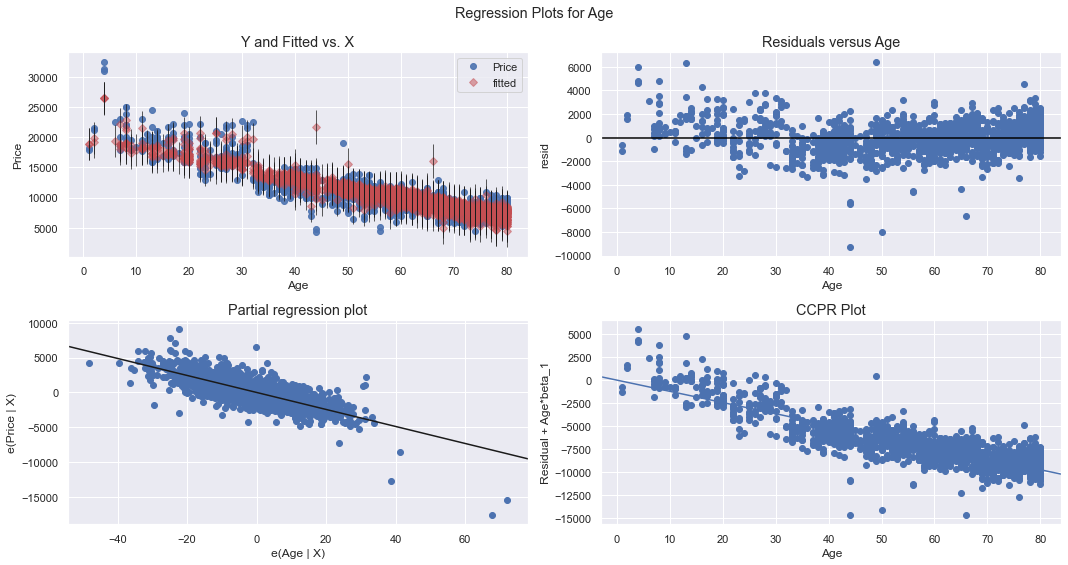

In [64]:
import statsmodels.api as smf
fig=plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(raw_model,"Age",fig=fig)
plt.show()

eval_env: 1


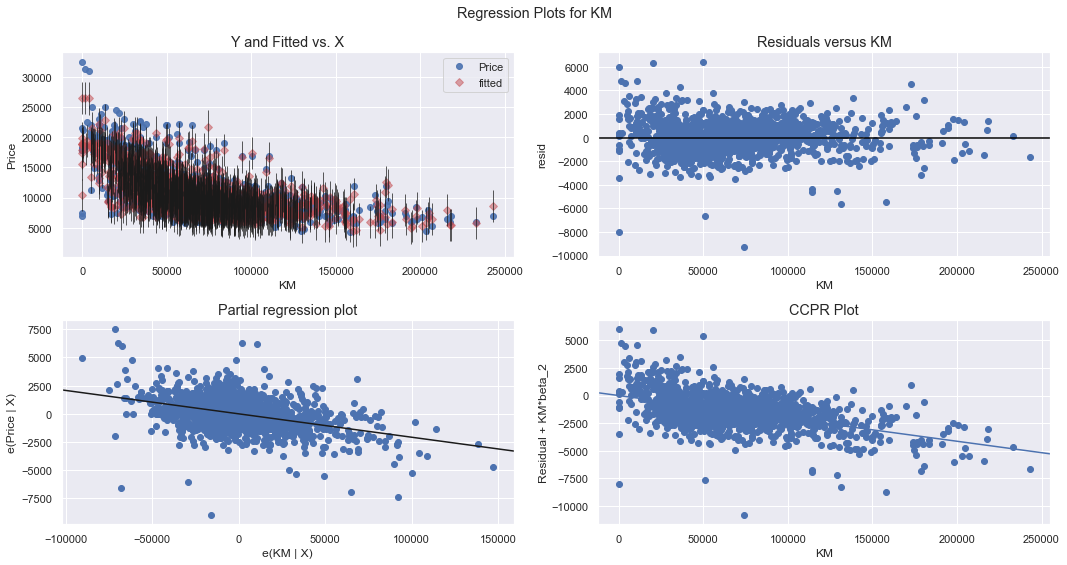

In [65]:
import statsmodels.api as smf
fig=plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(raw_model,"KM",fig=fig)
plt.show()

eval_env: 1


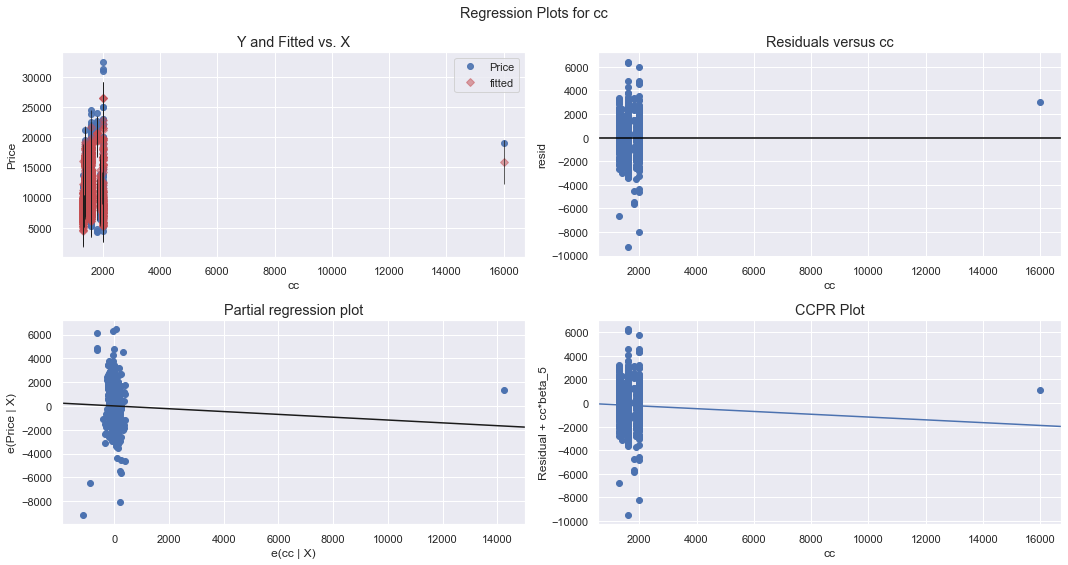

In [66]:
import statsmodels.api as smf
fig=plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(raw_model,"cc",fig=fig)
plt.show()

eval_env: 1


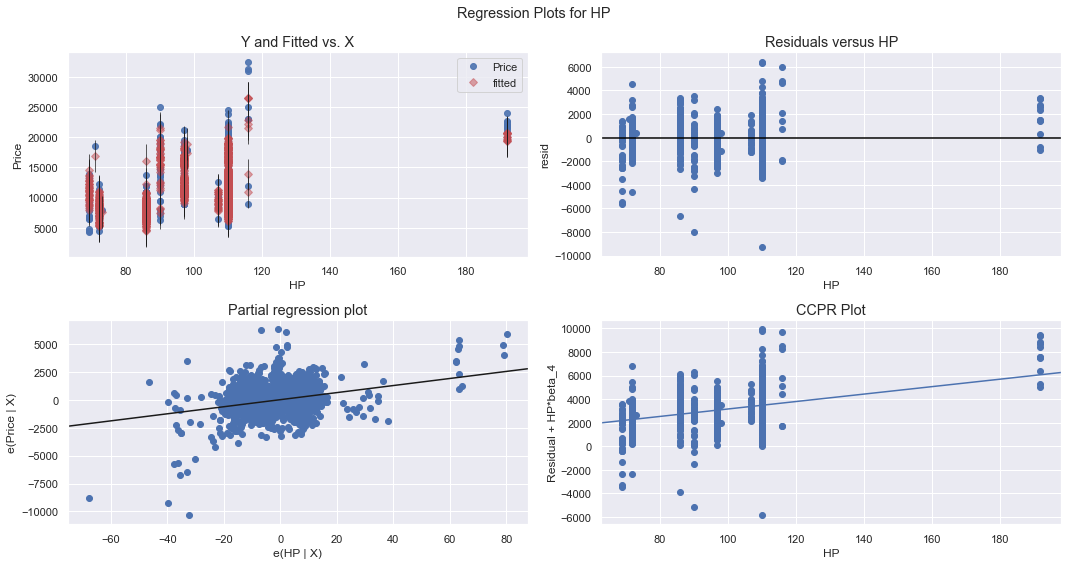

In [67]:
import statsmodels.api as smf
fig=plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(raw_model,"HP",fig=fig)
plt.show()

eval_env: 1


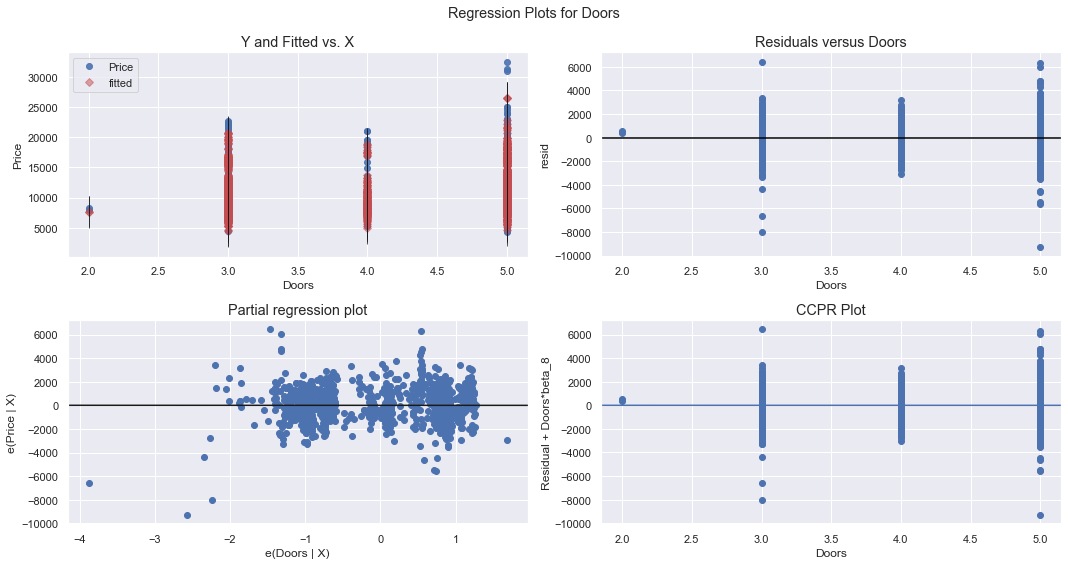

In [68]:
import statsmodels.api as smf
fig=plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(raw_model,"Doors",fig=fig)
plt.show()

eval_env: 1


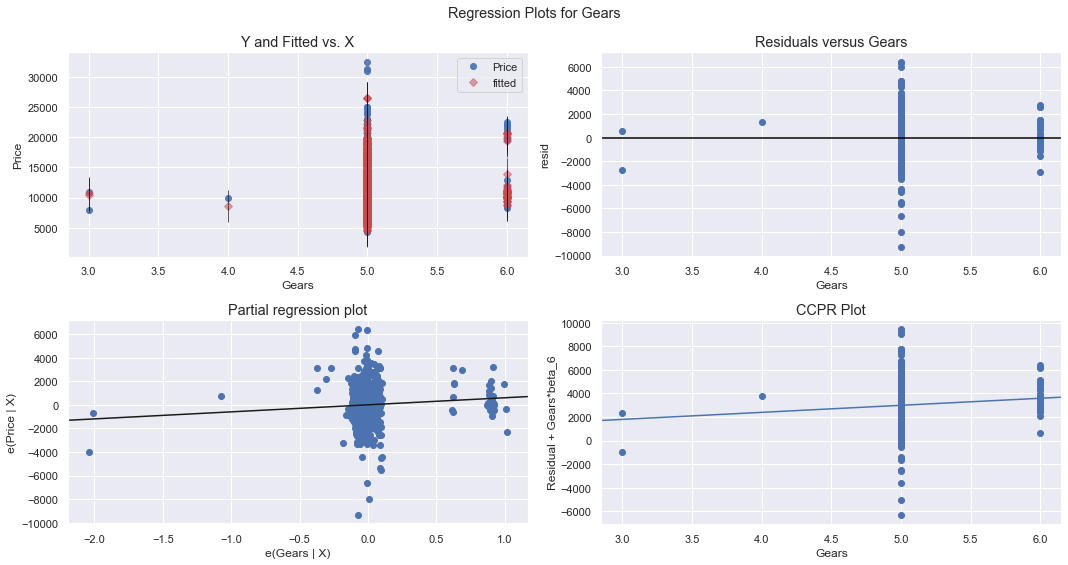

In [69]:
import statsmodels.api as smf
fig=plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(raw_model,"Gears",fig=fig)
plt.show()

eval_env: 1


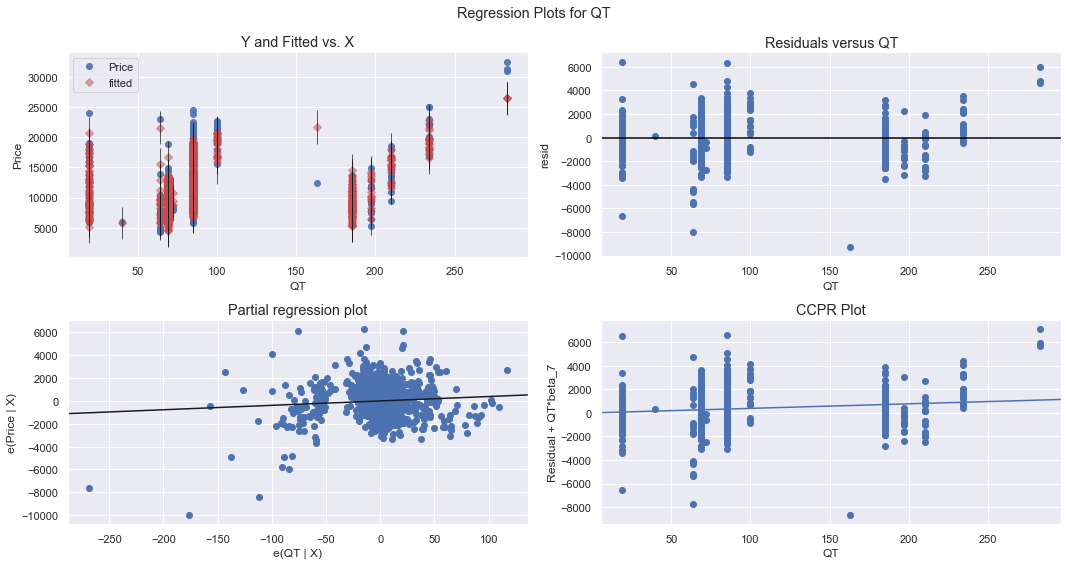

In [70]:
import statsmodels.api as smf
fig=plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(raw_model,"QT",fig=fig)
plt.show()

eval_env: 1


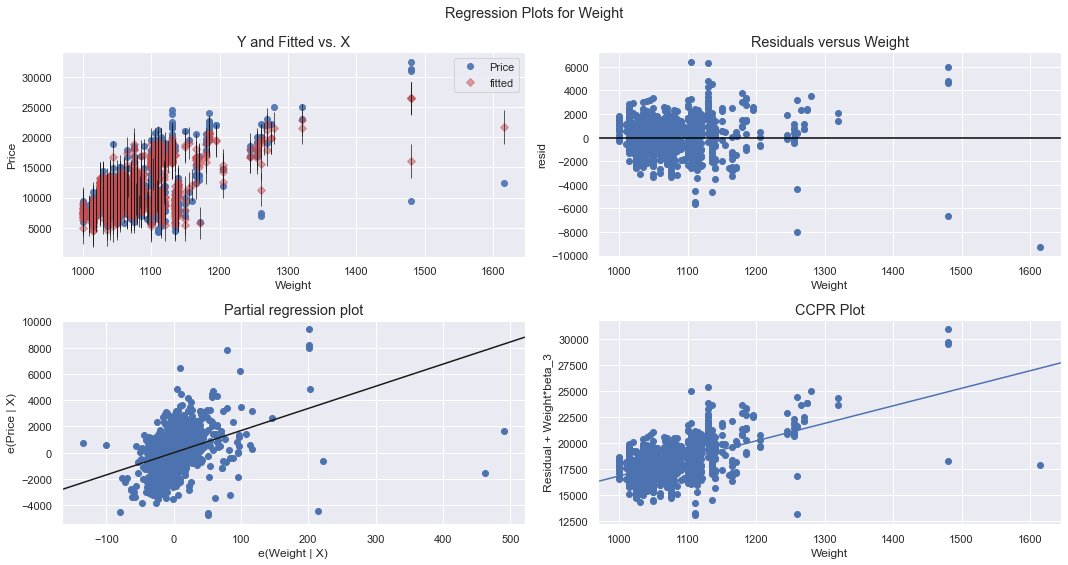

In [71]:
import statsmodels.api as smf
fig=plt.figure(figsize=(15,8))
smf.graphics.plot_regress_exog(raw_model,"Weight",fig=fig)
plt.show()

# Final result

In [84]:
results={'Models':['raw_model_rm_influencer','standard_transformed_model'],
   'R-squared values':[raw_model_no_influencer1.rsquared,standard_transformed_model.rsquared],
   'RMSE':[rmse1,rmse2]}
output=pd.DataFrame(results)
output

,Models,R-squared values,RMSE
0,raw_model_rm_influencer,0.889794,1131.774805
1,standard_transformed_model,0.889794,0.331972


## Prediction:

Per the above the R square value is same for both the models ( raw model removing outlier and scaled model) .. there is diff in RMSE value but lower RMSE is expected for the scaled data ( value will lie between 0-1) so shouldn't be compared.